In [6]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python {}'.format(sys.version))

Python 3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]


In [7]:
print('Numpy {}'.format(numpy.__version__))
print('Pandas {}'.format(pandas.__version__))
print('Matplotlib {}'.format(matplotlib.__version__))
print('Seaborn {}'.format(seaborn.__version__))
print('Scipy {}'.format(scipy.__version__))
print('Sklearn {}'.format(sklearn.__version__))

Numpy 1.14.5
Pandas 0.23.3
Matplotlib 2.2.2
Seaborn 0.9.0
Scipy 1.1.0
Sklearn 0.19.2


In [8]:
#import neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Load the dataset from csv file using pandas
data = pd.read_csv('creditcard.csv')

In [10]:
#Explore the data set

print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
print(data.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.22

In [12]:
print(data.shape)

(284807, 31)


In [14]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [18]:
#We are working on only a fraction(10%) of the dataset (Sample) for less computational overhead
data = data.sample(frac = 0.1, random_state = 1)

In [17]:
print(data.shape)

(28481, 31)


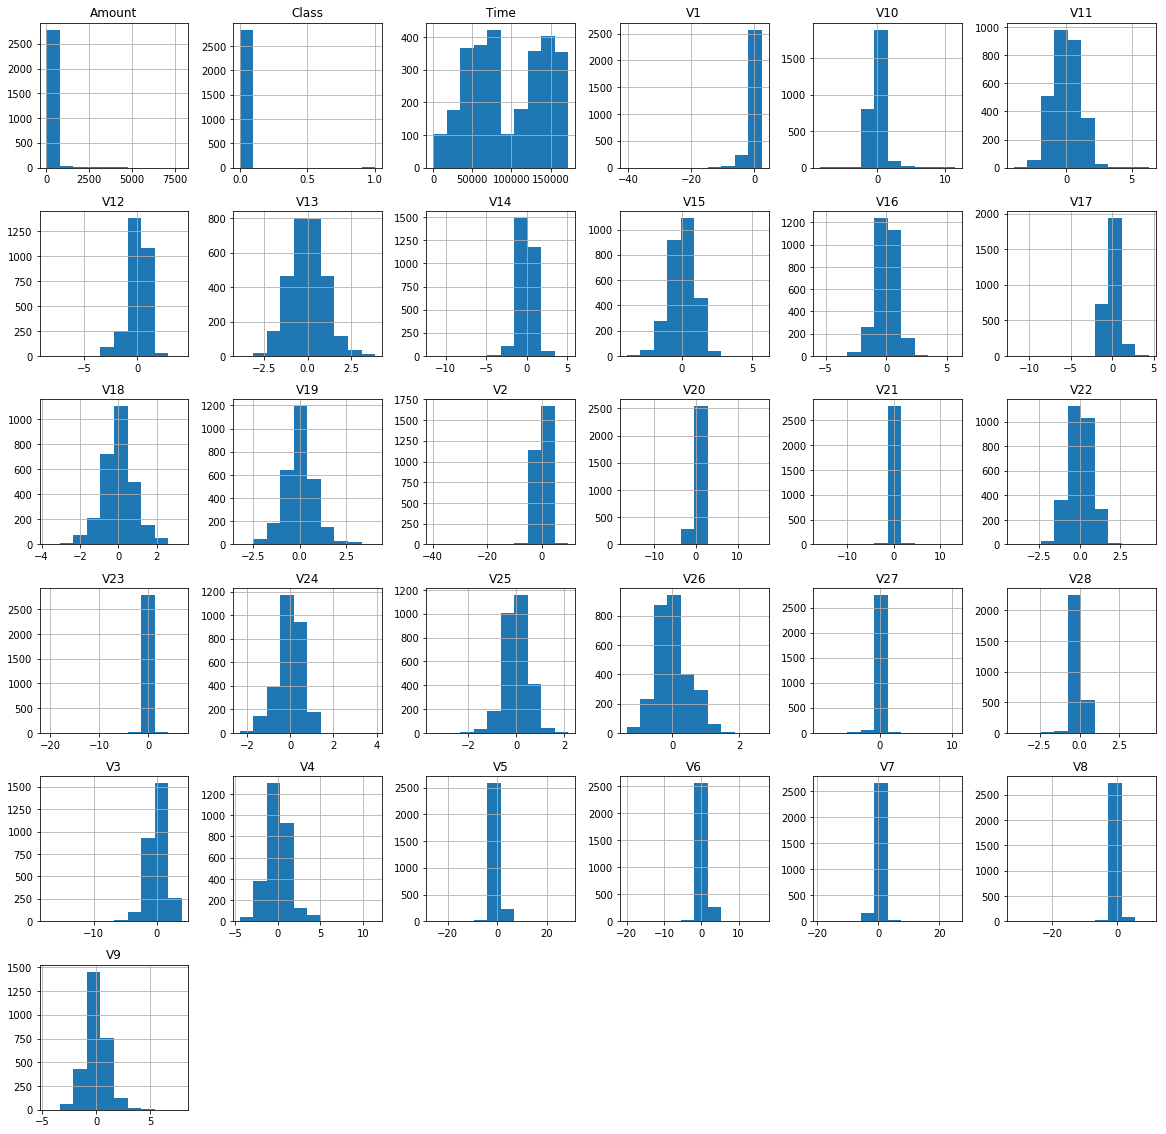

In [19]:
#Plotting histogram of each parameter for visualization
data.hist(figsize = (20,20))
plt.show()

In [28]:
#Determine number of fraud credit card cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud)/(float)(len(valid))
print('Outlier fraction: {}'.format(outlier_fraction))

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

Outlier fraction: 0.0017587055926837848
Fraud cases: 5
Valid cases: 2843


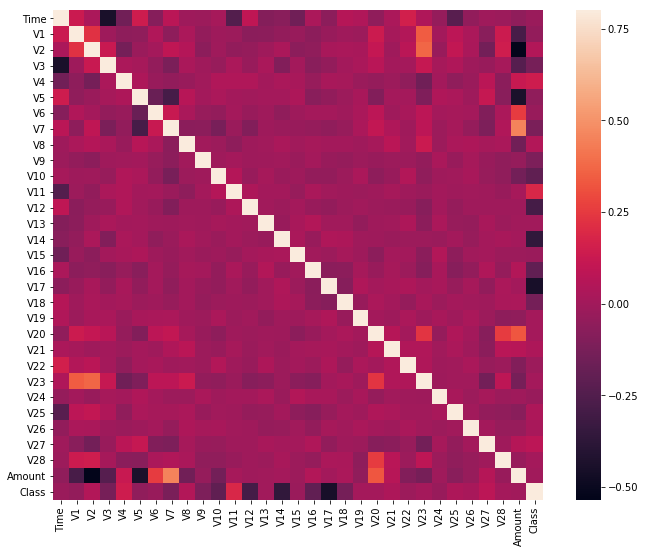

In [30]:
#Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()



In [34]:
#Get all the columns from the dataset
columns = data.columns.tolist()

#Removing the column of class from the dataset(Unsupervised learning)
columns = [c for c in columns if c not in ['Class']]

#Storing the class labels of the data
target = 'Class'

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(2848, 30)
(2848,)


In [38]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

#define the outlier detection methods
classifiers = { 
    'Isolation Forest' : IsolationForest(max_samples = len(X),
                                         contamination = outlier_fraction,
                                         random_state = state),
    'Local Outlier Factor' : LocalOutlierFactor(n_neighbors = 20,
                                                   contamination = outlier_fraction,
                                                   )
}



In [45]:
#Fit the model 
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    
    if(clf_name == 'Local Outlier factor'):
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    elif(clf_name =='Isolation Forest'):
        clf.fit(X)
        y_pred = clf.predict(X)
        scores_pred = clf.decision_function(X)
        
    #Reshape the prediction values (0 for valid, 1 for fraud)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    #Run classification metrics
    print('{}:{}'.format(clf_name,n_errors))
    print('Accuracy score: {}'.format(accuracy_score(Y,y_pred)))
    print(classification_report(Y,y_pred))
    
    
    


Isolation Forest:9
Accuracy score: 0.9968398876404494
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2843
          1       0.17      0.20      0.18         5

avg / total       1.00      1.00      1.00      2848

Local outlier Factor:5
Accuracy score: 0.9982443820224719
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2843
          1       0.00      0.00      0.00         5

avg / total       1.00      1.00      1.00      2848



/home/bhoomika/Credit_card_fraud/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
